## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [3]:
customerData = pd.read_csv('dataset\customerData_Clean.csv')

## Showing the data

In [4]:
customerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,806,25,1,1950,0,0
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,9,6,0,1950,2,1
2,2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,287,21,0,1960,0,0
3,3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,34,8,0,1980,1,1
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,2183,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,267,18,0,1960,1,1
2184,2184,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,30,22,1,1940,3,1
2185,2185,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,297,19,1,1980,0,0
2186,2186,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,324,23,0,1950,1,1


### Importing Machine Learning modules

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=1)

## Poisson Regression


### Predicting TotalPurchase
Predictors : Education, Marital_Status, Income, TotalChild, HaveChild, NumWebVisitsMonth, YearRange

In [43]:
df_train = pd.read_csv(r'dataset\new_train_data.csv')
df_cv = pd.read_csv(r'dataset\splitted_cv_data.csv')
df_test =  pd.read_csv(r'dataset\new_test_data.csv')

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1739
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5448.6
Date:                Tue, 19 Apr 2022   Deviance:                       3205.1
Time:                        15:42:28   Pearson chi2:                 3.19e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8883
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

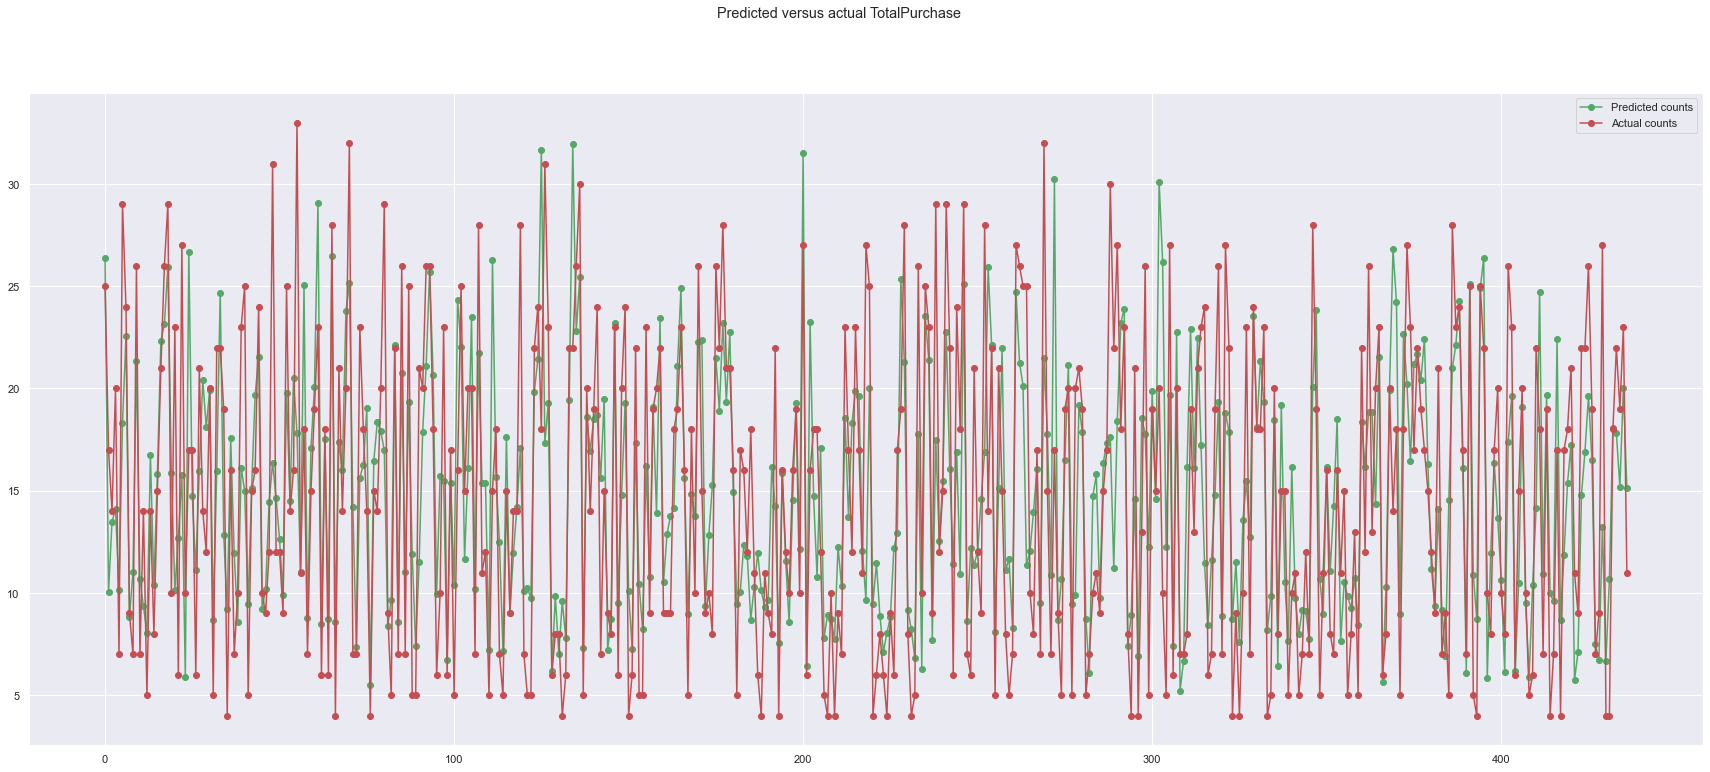

In [52]:
from patsy import dmatrices
import statsmodels.api as sm

# mask = np.random.rand(len(customerData)) < 0.8
# TotalPurchase ~ Year_Birth + Education + Marital_Status + Kidhome + Teenhome + Income + Recency + YearRange + HaveChild + Complain
# TotalPurchase ~ Income  + TotalChild + Teenhome + Kidhome + Year_Birth + Marital_Status
expr = """TotalPurchase ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual TotalPurchase')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

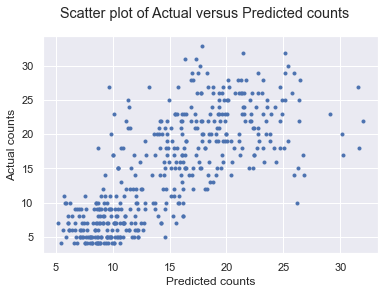

For test data:
Mean Squared Error (MSE) 	: 26.377814060883985
Root Mean Squared Error (RMSE) 	: 5.135933611417109
Explained Variance (R^2) 	: 0.5510621435231735

For train data:
Mean Squared Error (MSE) 	: 26.989875903143144
Root Mean Squared Error (RMSE) 	: 5.195178139692915
Explained Variance (R^2) 	: 0.5259304067206652


In [55]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
print("For test data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['TotalPurchase']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

The Poisson Regression works relatively well for predicting TotalPurchase (with an R^2 value of 0.54)

#### The importance of the Income variable: removing Income

In [58]:
expr = """TotalPurchase ~ Education + Marital_Status + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1740
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6782.0
Date:                Tue, 19 Apr 2022   Deviance:                       5871.9
Time:                        15:43:36   Pearson chi2:                 5.88e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4877
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

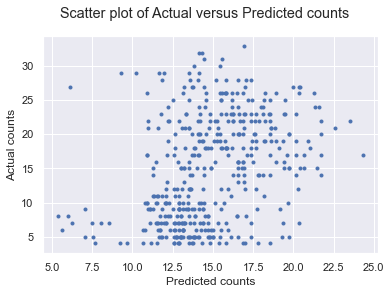

Mean Squared Error (MSE) 	: 51.227670565234284
Root Mean Squared Error (RMSE) 	: 7.157350806355259
Explained Variance (R^2) 	: 0.12797680165544156

For train data:
Mean Squared Error (MSE) 	: 47.50293015426502
Root Mean Squared Error (RMSE) 	: 6.8922369484997414
Explained Variance (R^2) 	: 0.16562436749898113


In [59]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['TotalPurchase']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

By removing the income variable, the Poisson Regression performs significantly worse, with an R^2 value of 0.13, making it the best predictor. This pattern can be observd in later models as well.

#### The worse predicting variable: removing Education

In [60]:
expr = """TotalPurchase ~ Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['TotalPurchase']

                 Generalized Linear Model Regression Results                  
Dep. Variable:          TotalPurchase   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1743
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5450.8
Date:                Tue, 19 Apr 2022   Deviance:                       3209.5
Time:                        15:43:44   Pearson chi2:                 3.19e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8880
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

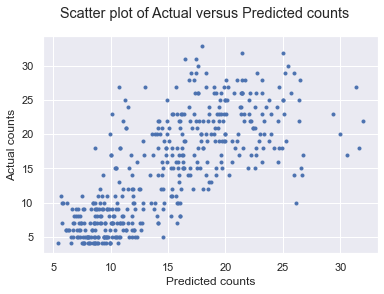

Mean Squared Error (MSE) 	: 26.26318583105851
Root Mean Squared Error (RMSE) 	: 5.124762026773391
Explained Variance (R^2) 	: 0.5530068107256361

For train data:
Mean Squared Error (MSE) 	: 27.053700515358695
Root Mean Squared Error (RMSE) 	: 5.201317190420009
Explained Variance (R^2) 	: 0.5248093453247986


In [61]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['TotalPurchase']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

By repeatedly removing and comparing variables, we found out that the Education variable is the 'worst' predictor. However, the change in R^2 value is not significant

### 2. Predicting MntGroceryProducts

                 Generalized Linear Model Regression Results                  
Dep. Variable:     MntGroceryProducts   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1739
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70141.
Date:                Tue, 19 Apr 2022   Deviance:                   1.2923e+05
Time:                        15:43:54   Pearson chi2:                 1.37e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

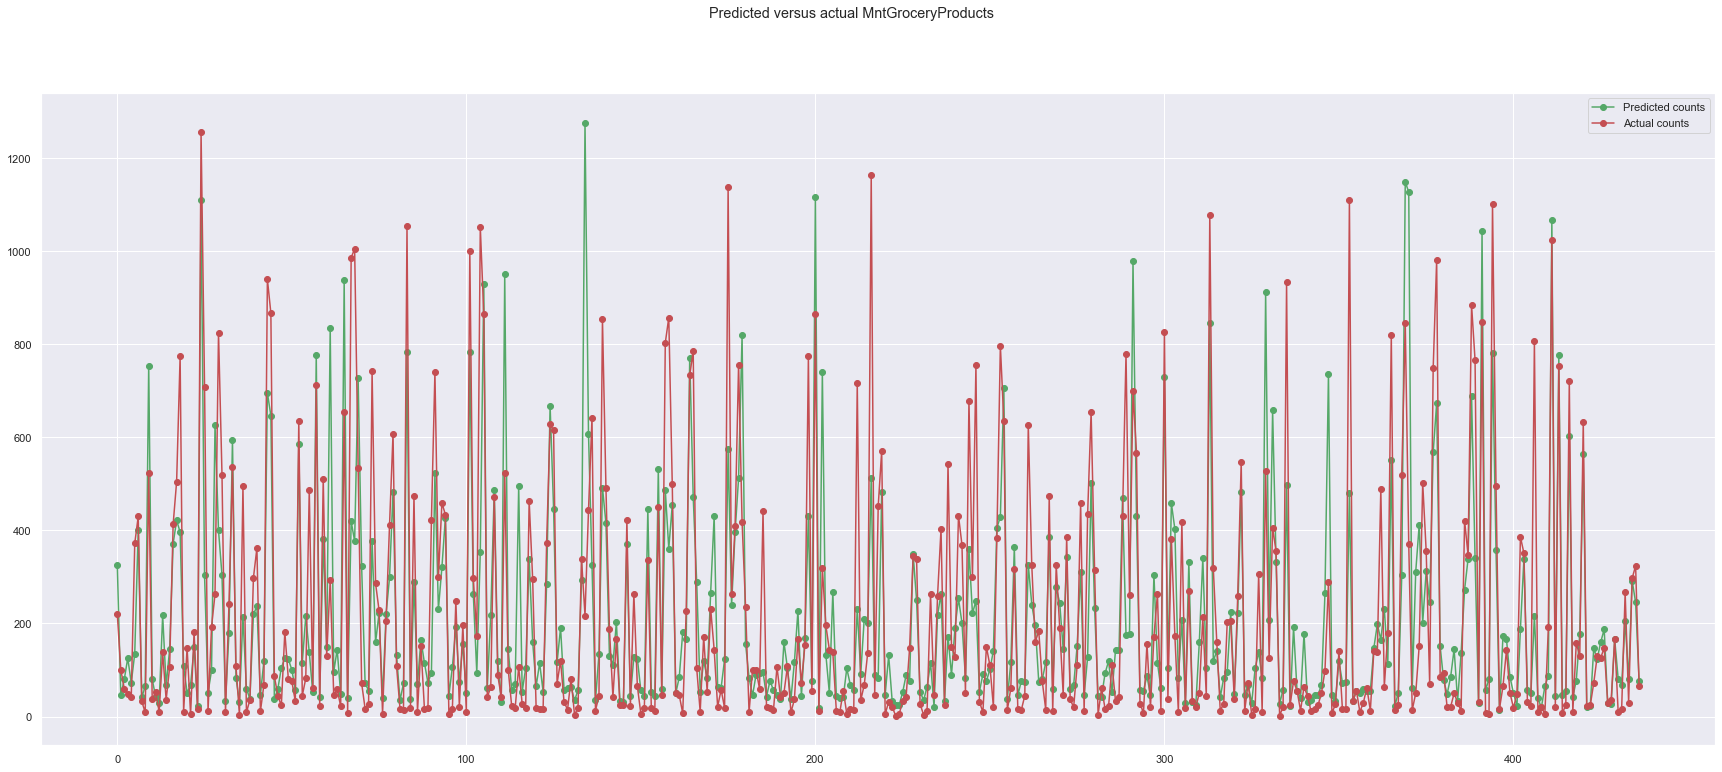

In [62]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntGroceryProducts ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGroceryProducts']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntGroceryProducts')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

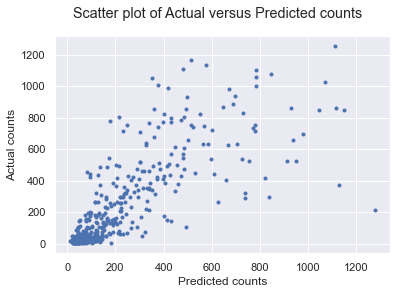

Mean Squared Error (MSE) 	: 30530.208191695503
Root Mean Squared Error (RMSE) 	: 174.7289563629781
Explained Variance (R^2) 	: 0.6140259633256462

For train data:
Mean Squared Error (MSE) 	: 23917.609022221954
Root Mean Squared Error (RMSE) 	: 154.653189499027
Explained Variance (R^2) 	: 0.6826081436257407


In [64]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntGroceryProducts']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))


The Poisson Regression model works even better in predicting MntGroceryProducts, with a relatively high R^2 value of 0.66

#### The worst predicting variables: (All variables except Income perform somewhat equally well)

In [65]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntGroceryProducts ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth """

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGroceryProducts']

                 Generalized Linear Model Regression Results                  
Dep. Variable:     MntGroceryProducts   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1740
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70175.
Date:                Tue, 19 Apr 2022   Deviance:                   1.2930e+05
Time:                        15:44:15   Pearson chi2:                 1.37e+05
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

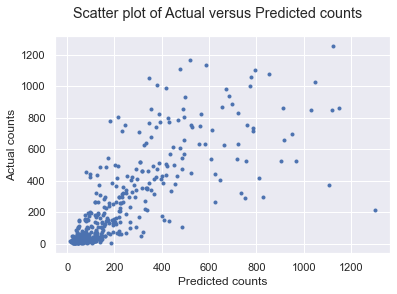

Mean Squared Error (MSE) 	: 30476.862340660373
Root Mean Squared Error (RMSE) 	: 174.57623647180728
Explained Variance (R^2) 	: 0.6147380262324074

For train data:
Mean Squared Error (MSE) 	: 23932.856889443054
Root Mean Squared Error (RMSE) 	: 154.70247861441345
Explained Variance (R^2) 	: 0.6824058011224179


In [66]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntGroceryProducts']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

Similar to the previous model, none of the variables affect the model significantly except Income

### 3. Predicting MntWines

                 Generalized Linear Model Regression Results                  
Dep. Variable:               MntWines   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1739
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0344e+05
Date:                Tue, 19 Apr 2022   Deviance:                   1.9557e+05
Time:                        15:44:23   Pearson chi2:                 1.99e+05
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

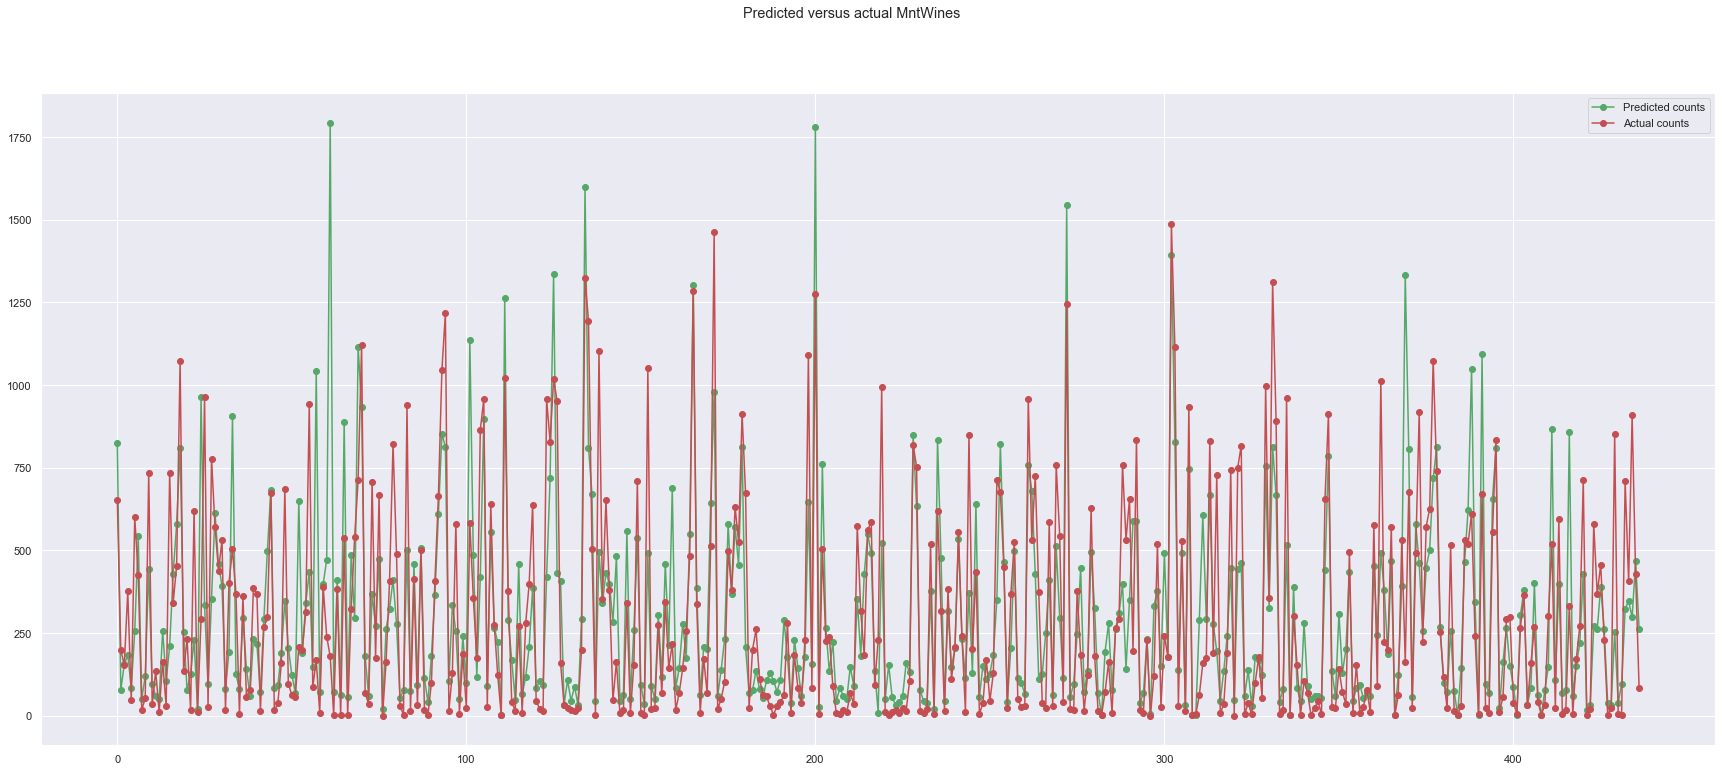

In [67]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntWines ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntWines']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntWines')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

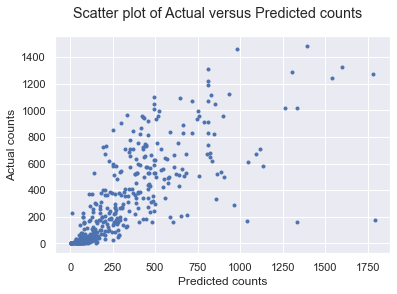

Mean Squared Error (MSE) 	: 47595.86445668817
Root Mean Squared Error (RMSE) 	: 218.1647644710029
Explained Variance (R^2) 	: 0.571757089197801

For train data:
Mean Squared Error (MSE) 	: 49756.75887286173
Root Mean Squared Error (RMSE) 	: 223.06223094208872
Explained Variance (R^2) 	: 0.5606727257845956


In [68]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntWines']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

For predicting MntWines, the model performs somewhat as well as predicting TotalPurchase, though the model might improve if the outlier is removed (where the predicted value of 3000+ is much higher than the actual value)

#### The worse predicting variable: Education, Marital_Status, HaveChild (not a lot tho)

In [69]:
from patsy import dmatrices
import statsmodels.api as sm

expr = """MntWines ~ Income + TotalChild + NumWebVisitsMonth """

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntWines']

                 Generalized Linear Model Regression Results                  
Dep. Variable:               MntWines   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1747
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1435e+05
Date:                Tue, 19 Apr 2022   Deviance:                   2.1737e+05
Time:                        15:44:34   Pearson chi2:                 2.21e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6256      0.01

<Figure size 432x288 with 0 Axes>

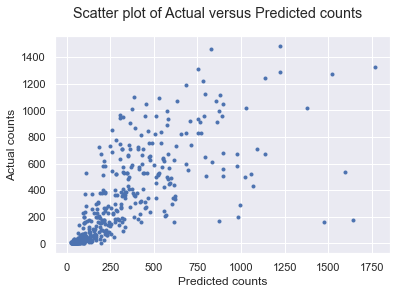

Mean Squared Error (MSE) 	: 53919.899385110395
Root Mean Squared Error (RMSE) 	: 232.20658772978513
Explained Variance (R^2) 	: 0.514857549092435

For train data:
Mean Squared Error (MSE) 	: 54756.220074351135
Root Mean Squared Error (RMSE) 	: 234.00047024386754
Explained Variance (R^2) 	: 0.5165299859448031


In [71]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntWines']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

The 'worst' variables for predicting MntWines are Education, Marital_Status, and HaveChild, even though it still is not very significant

### Predicting MntGoldProds

                 Generalized Linear Model Regression Results                  
Dep. Variable:           MntGoldProds   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1739
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33041.
Date:                Tue, 19 Apr 2022   Deviance:                       57631.
Time:                        15:44:47   Pearson chi2:                 6.87e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

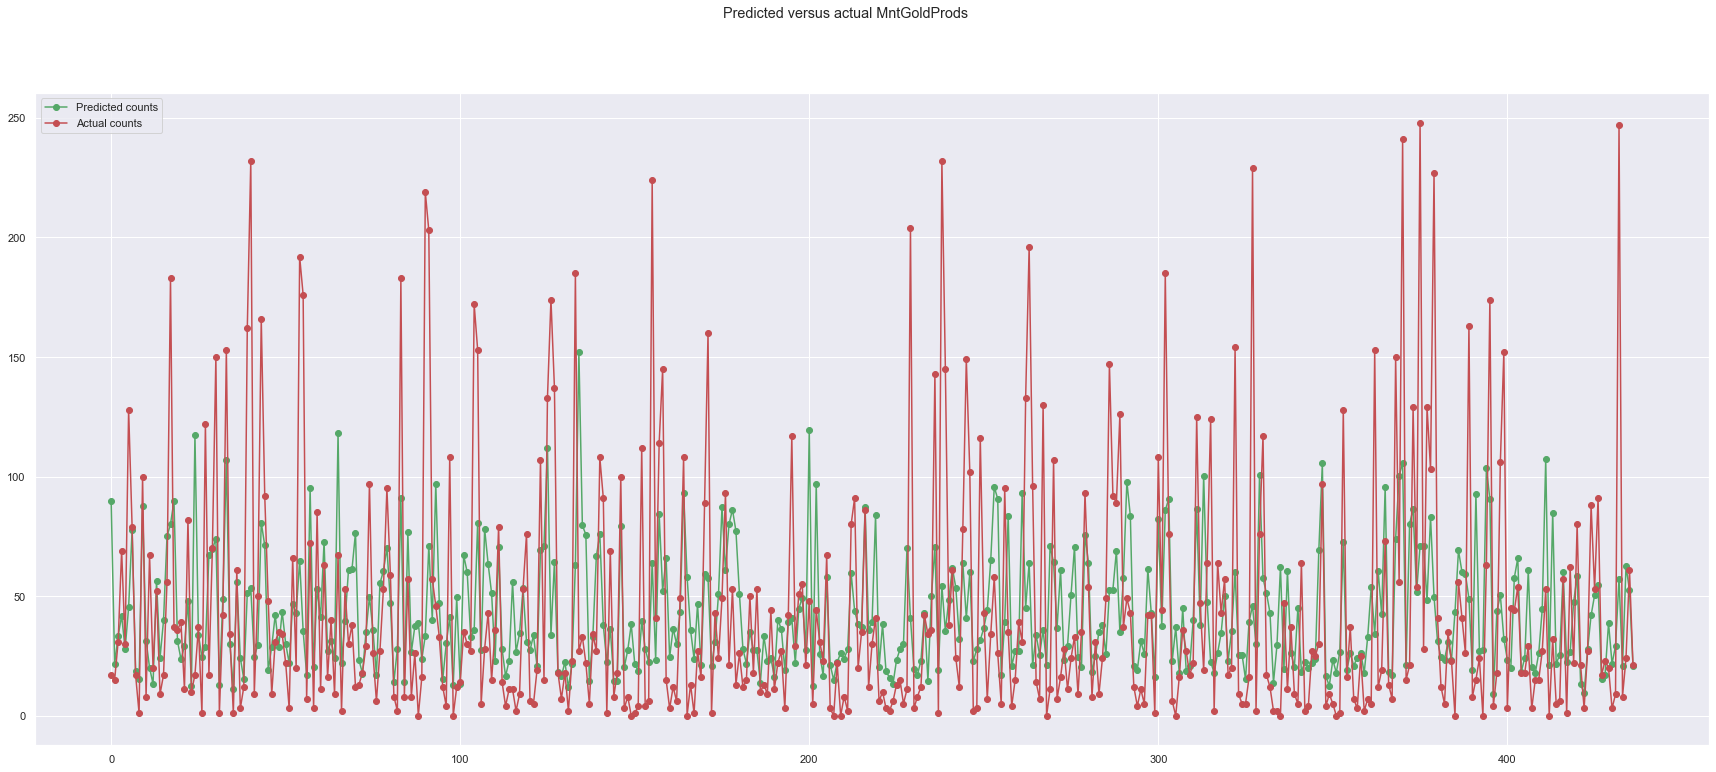

In [72]:
expr = """MntGoldProds ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGoldProds']
fig = plt.figure(figsize = (30, 12))
fig.suptitle('Predicted versus actual MntGoldProds')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

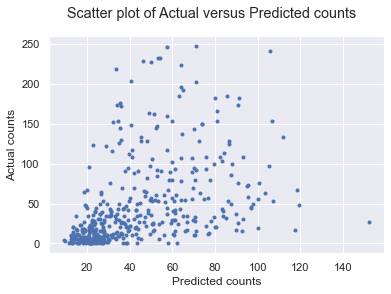

Mean Squared Error (MSE) 	: 2276.859875591564
Root Mean Squared Error (RMSE) 	: 47.716452881491136
Explained Variance (R^2) 	: 0.19943732386906032

For train data:
Mean Squared Error (MSE) 	: 1886.6879470918625
Root Mean Squared Error (RMSE) 	: 43.43602130826283
Explained Variance (R^2) 	: 0.23646880169821993


In [74]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntGoldProds']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

Surprisingly, the Poisson Regression model performs the worst in predicting MntGoldProds. 

#### The worse predicting variable: Marital_Status, HaveChild, YearRange (not very significant tho)

In [75]:
expr = """MntGoldProds ~ Education + Marital_Status + Income + TotalChild + HaveChild + NumWebVisitsMonth + YearRange"""

y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

print(poisson_training_results.summary())

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['MntGoldProds']


                 Generalized Linear Model Regression Results                  
Dep. Variable:           MntGoldProds   No. Observations:                 1751
Model:                            GLM   Df Residuals:                     1739
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -33041.
Date:                Tue, 19 Apr 2022   Deviance:                       57631.
Time:                        15:45:05   Pearson chi2:                 6.87e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Figure size 432x288 with 0 Axes>

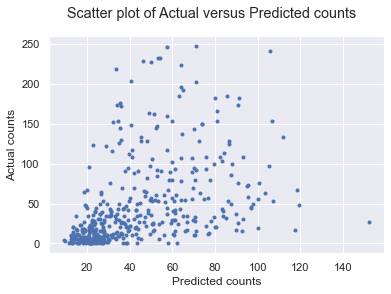

Mean Squared Error (MSE) 	: 2276.859875591564
Root Mean Squared Error (RMSE) 	: 47.716452881491136
Explained Variance (R^2) 	: 0.19943732386906032

For train data:
Mean Squared Error (MSE) 	: 1886.6879470918625
Root Mean Squared Error (RMSE) 	: 43.43602130826283
Explained Variance (R^2) 	: 0.23646880169821993


In [76]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts, predicted_counts))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts, predicted_counts)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts, predicted_counts))

poisson_predictions_train = poisson_training_results.get_prediction(X_train)
predictions_summary_frame_train = poisson_predictions_train.summary_frame()
predicted_counts_train = predictions_summary_frame_train['mean']
actual_counts_train = y_train['MntGoldProds']
print("")
print("For train data:")
print("Mean Squared Error (MSE) \t:", mean_squared_error(actual_counts_train, predicted_counts_train))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(actual_counts_train, predicted_counts_train)))
print("Explained Variance (R^2) \t:", explained_variance_score(actual_counts_train, predicted_counts_train))

As before, the 'worst' variables are not very significant.